In [26]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy

In [27]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
df.shape

(1338, 7)

In [29]:
# Datatypes of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [30]:
# There are no null values in the dataframe
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
# Five Point Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


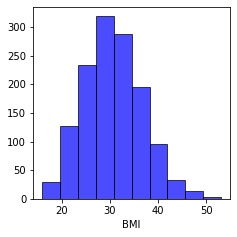

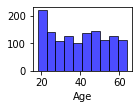

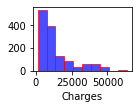

In [32]:
'''
- BMI is normally distributed
- Age is uniformly distributed
- Charges is skewed
'''
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)

plt.hist(df.bmi, edgecolor="black", color="blue", alpha=0.7)
plt.xlabel("BMI")
plt.show()

plt.subplot(3,3,2)
plt.hist(df.age, edgecolor="black", color="blue", alpha=0.7)
plt.xlabel("Age")
plt.show()

plt.subplot(3,3,3)
plt.hist(df.charges, edgecolor="red", color="blue", alpha=0.7)
plt.xlabel("Charges")
plt.show()

In [33]:
# Charge is most skewed
skewness = pd.DataFrame({'skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])
skewness

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


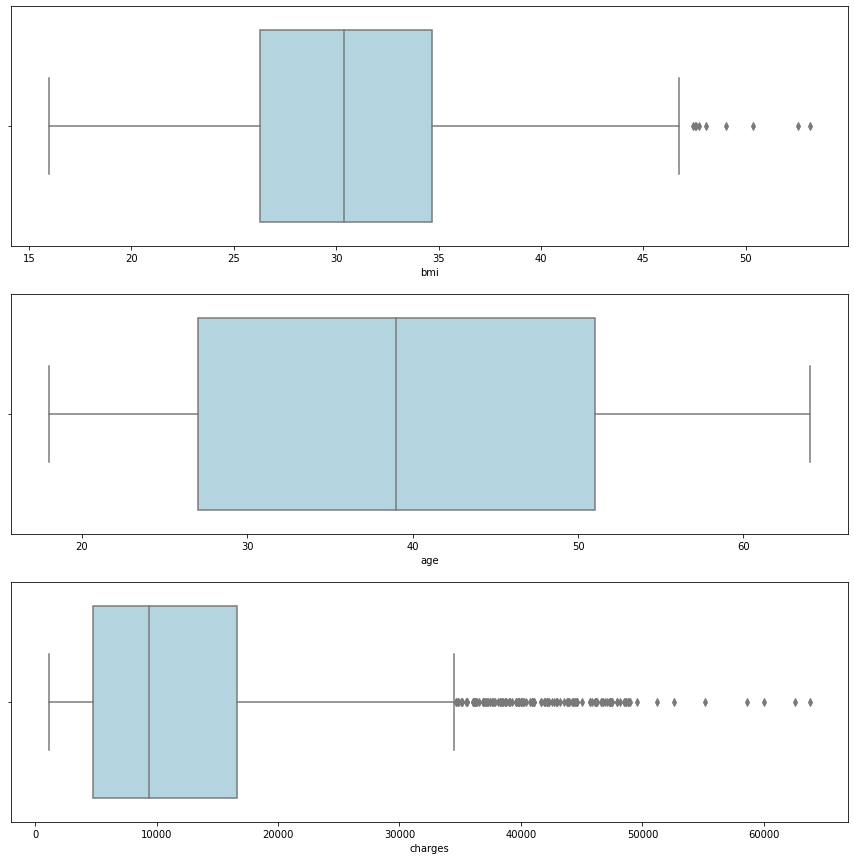

In [34]:
'''
BMI has a few extreme values owing to its skewness
Age hardly has any values as it is uniform
Charges has many outliers owing to its highly skewed nature of data
'''
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x=df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x=df.charges, color='lightblue')

plt.show()

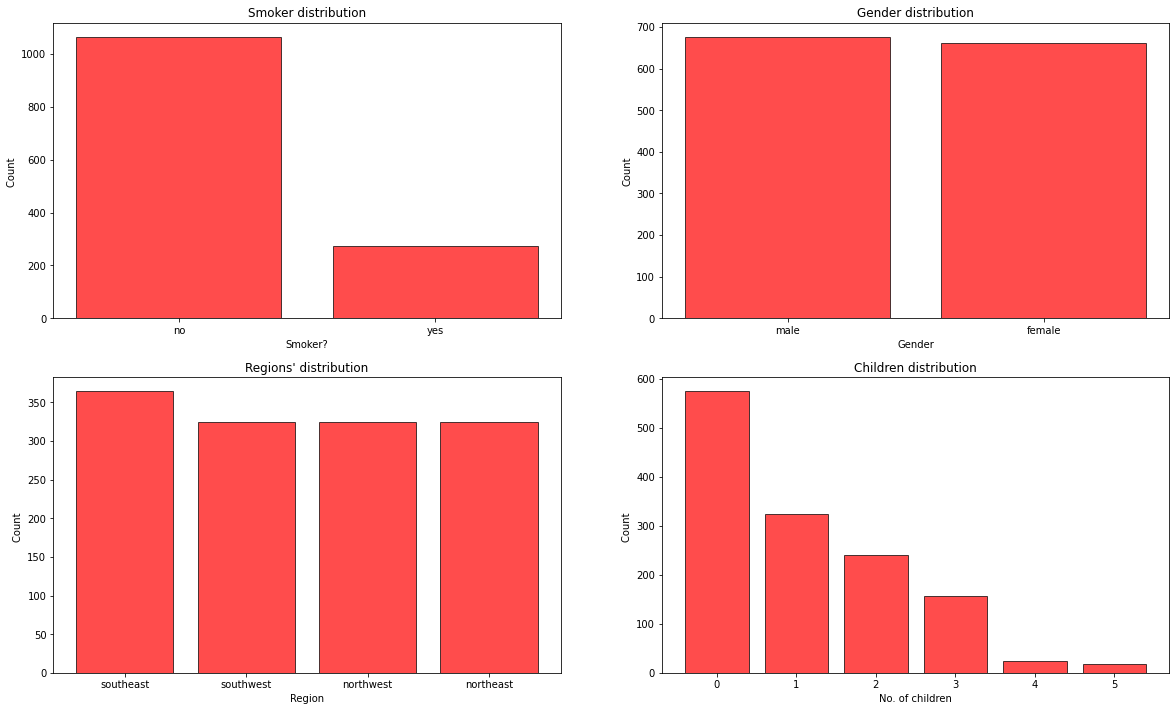

In [35]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

In [36]:
'''
The number of smokers < number of non-smokers
Gender is evenly distributed
Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair
'''

'\nThe number of smokers < number of non-smokers\nGender is evenly distributed\nMost instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair\n'

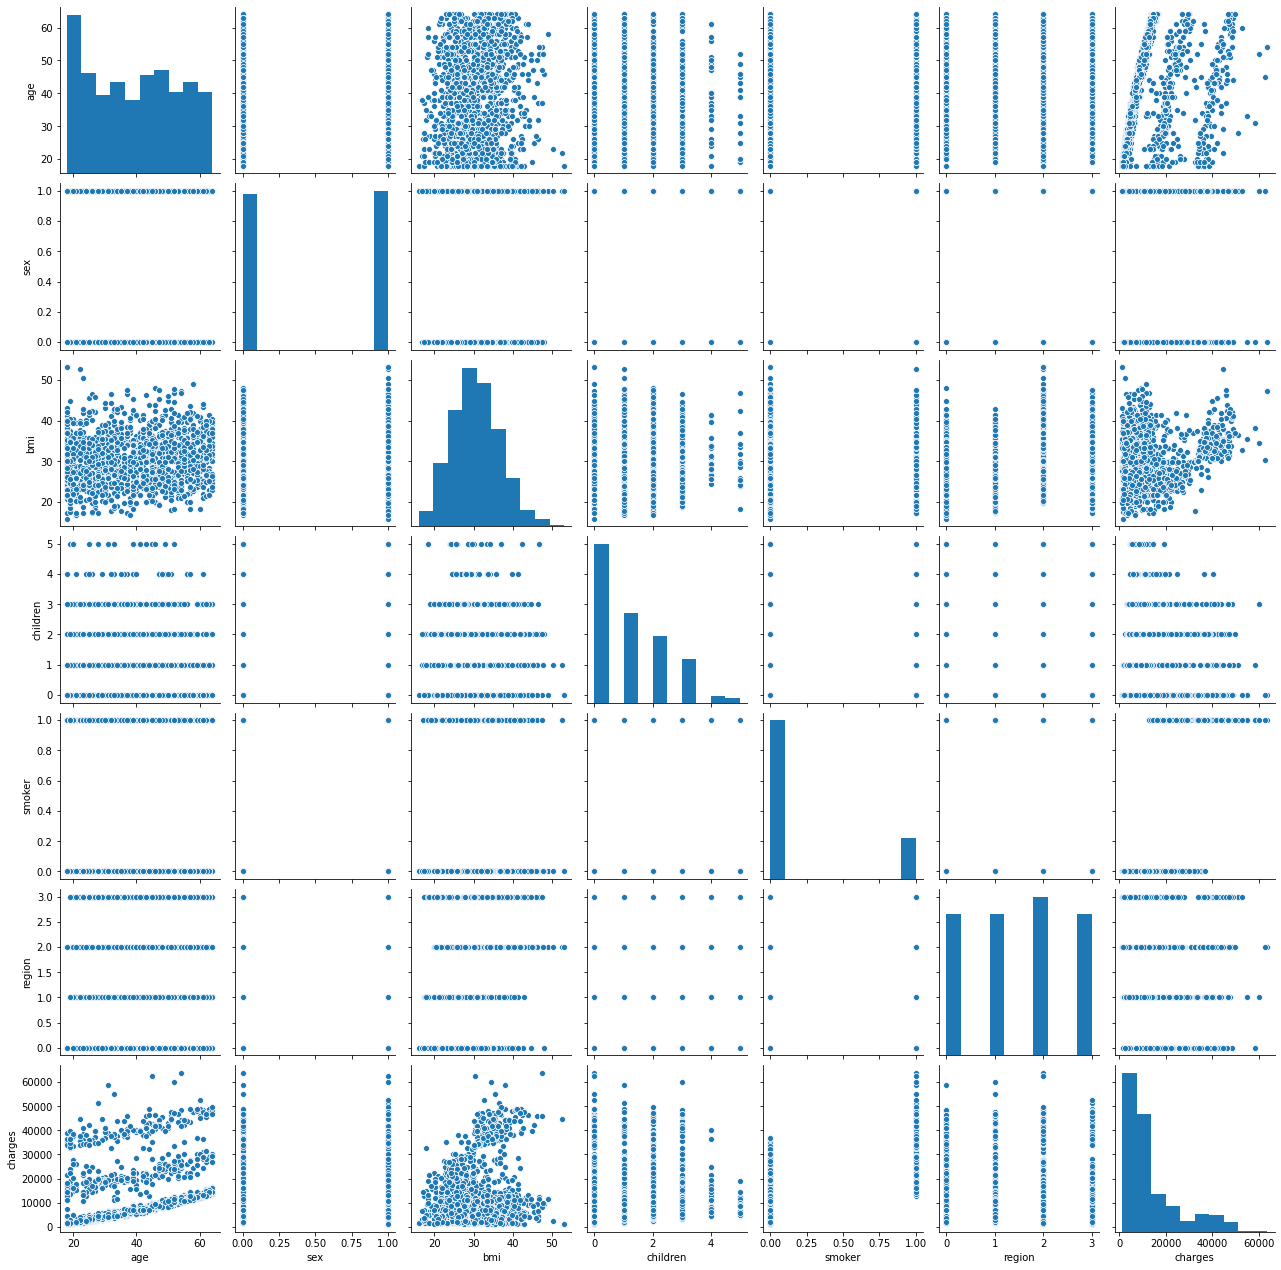

In [39]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:, ['sex', 'smoker', 'region']] = df_encoded.loc[:, ['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)
sns.pairplot(df_encoded)

In [40]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

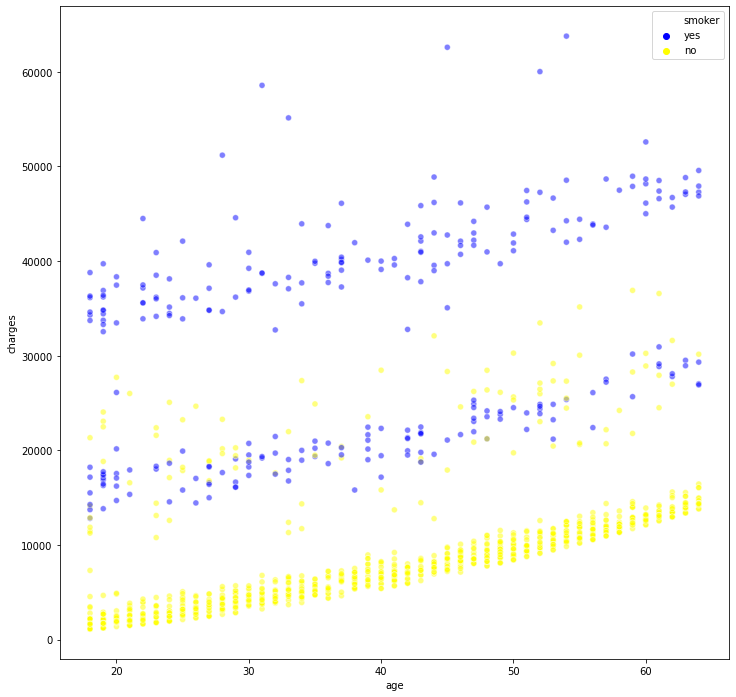

In [41]:
plt.figure(figsize=(12,12))
sns.scatterplot(df.age, df.charges, hue=df.smoker, palette=['blue', 'yellow'], alpha=0.5)
plt.show()

In [44]:
# T-Test to check dependency os smokers on charges
H0 = "The charges of a smoker and a non-smoker are same"
HA = "The charges of a smoker and a non-smoker are different"

x = np.array(df[df.smoker == 'yes'].charges)
y = np.array(df[df.smoker == 'no'].charges)

t, p_value = stats.ttest_ind(x, y, axis=0)

if p_value < 0.005:
    print(f'{HA} as the p_value ({p_value}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value}) > 0.05')

The charges of a smoker and a non-smoker are different as the p_value (8.271435842177219e-283) < 0.05


In [45]:
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [47]:
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [49]:
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [51]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
